In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [8]:
a = np.empty((0,1,1,1))

In [13]:
a.shape[0]

0

In [3]:
a = np.zeros((600,600))

In [4]:
a[np.newaxis,np.newaxis,:,:].shape

(1, 1, 600, 600)

In [5]:
data_300=np.loadtxt('3000000.csv',unpack=True,delimiter=',',skiprows=6)
print(data_300.shape)
data=data_300.T
print(data.shape)

(4, 1538656)
(1538656, 4)


In [3]:
data= sorted(data,key=lambda x:x[1])
data = np.array(data)


In [4]:
for i in range(data.shape[0]):
    if data[i][1]>4:
        data = data[:i,:]
        break
print(f"y-cut data nums: {data.shape}")

y-cut data nums: (250782, 4)


In [5]:
data= sorted(data,key=lambda x:x[3])
data = np.array(data)
for i in range(data.shape[0]):
    if data[i][3]>0:
        data = data[i:,:]
        break
print(f"v-cut data nums: {data.shape}")

v-cut data nums: (199898, 4)


In [6]:
x=data[:,0]
y=data[:,1]
z=data[:,2]
v=data[:,3]


Text(0.5, 0, 'Z-axis')

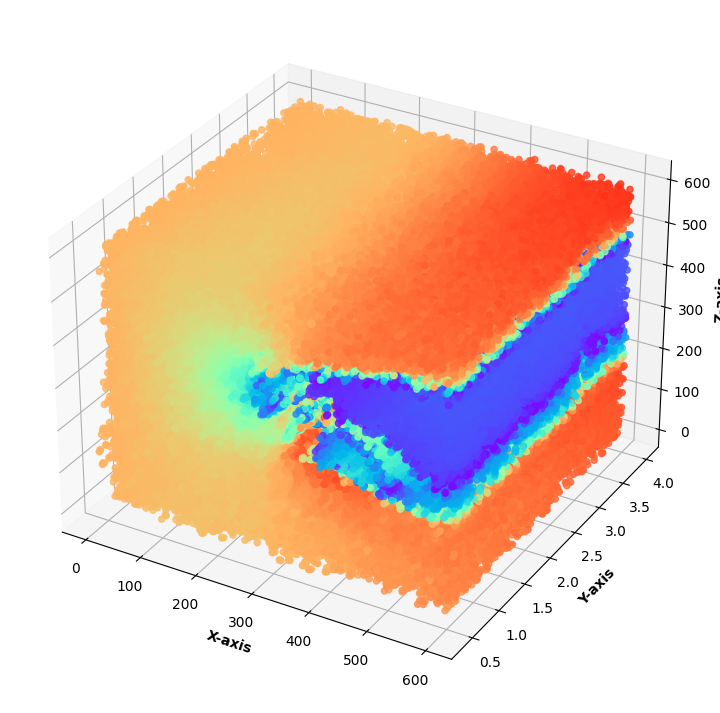

In [7]:
fig = plt.figure(figsize = (16,9))
ax = plt.axes(projection="3d")
ax.grid(b=True, color='grey',linestyle='-',linewidth=0.3,alpha=0.2)
sctt = ax.scatter3D(x,y,z,alpha=0.8,c=v,cmap='rainbow')
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')


(0.0, 600.0)

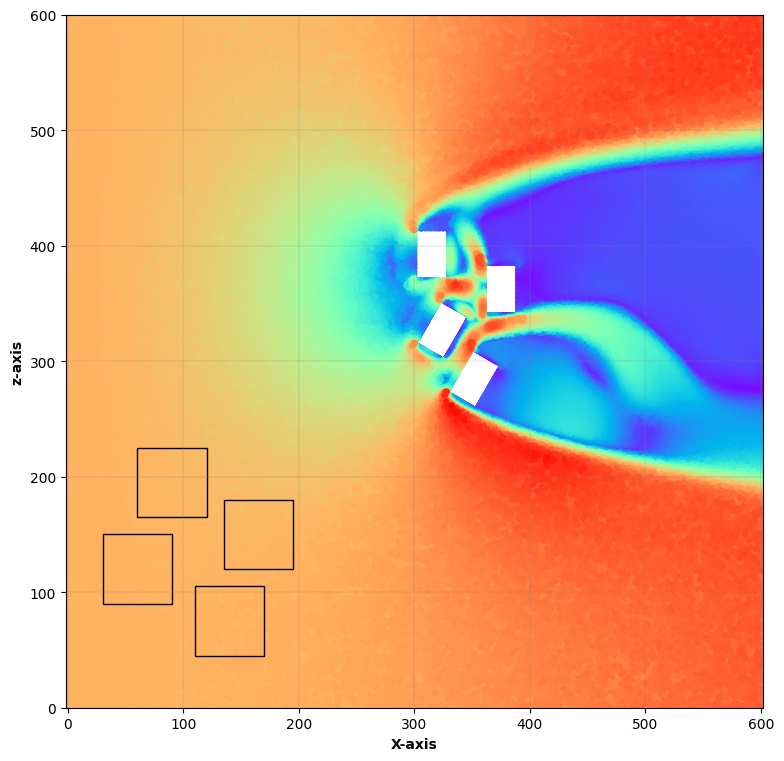

In [8]:
points = 5
fig = plt.figure(figsize = (9,9))
ax = plt.axes()
ax.grid(color='grey',linestyle='-',linewidth=0.3,alpha=0.6)
sctt = ax.scatter(x,z,c=v,s=10,cmap='rainbow')
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('z-axis', fontweight ='bold')
ax.axis('equal')
rect1 = patches.Rectangle((30, 90), 60, 60, linewidth=1, edgecolor='black', facecolor='none')
rect2 = patches.Rectangle((60, 165), 60, 60, linewidth=1, edgecolor='black', facecolor='none')
rect3 = patches.Rectangle((110, 45), 60, 60, linewidth=1, edgecolor='black', facecolor='none')
rect4 = patches.Rectangle((135, 120), 60, 60, linewidth=1, edgecolor='black', facecolor='none')
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)
plt.xlim((0,600))
plt.ylim((0,600))


In [4]:
from collections import deque

def csv_to_npy(filename, resolution=600):

    data=np.loadtxt(filename,unpack=True,delimiter=',',skiprows=6)

    ycut=3

    data=data.T
    data= sorted(data,key=lambda x:x[1])
    data = np.array(data)

    for i in range(data.shape[0]):
        if data[i][1]>ycut:
            data = data[:i,:]
            break
    print(f"y-cut data nums: {data.shape}")

    data= sorted(data,key=lambda x:x[3])
    data = np.array(data)

    for i in range(data.shape[0]):
        if data[i][3]>0:
            data = data[i:,:]
            break
    print(f"v-cut data nums: {data.shape}")

    data_grid=np.zeros((resolution,resolution))
    data_visit=np.zeros((resolution,resolution),dtype='bool')
    data_floor=np.floor(data[:,:3])
    data_floor=np.concatenate((data_floor,data[:,3].reshape(-1,1)),axis=1)

    for x,y,z,v in data_floor:
        x_=int(x)//(600//resolution)
        z_=int(z)//(600//resolution)
        if x_ == resolution: x_-=1
        if z_ == resolution: z_-=1
        if data_grid[z_][x_]<v:
            data_grid[z_][x_]=v
            data_visit[z_][x_]=True

    print(f"grid data nums:{np.sum(data_visit)}/{resolution*resolution}")
    print("csv complete")

    return data_grid

def get_error(data_1,data_2,res):
    data_error = []
    for z in range(res):
        for x in range(res):
            if data_1[z][x]==0. or data_2[z][x]==0.: continue
            data_error.append((x,z,abs(data_1[z][x] - data_2[z][x])))
    return np.array(data_error)
##PLOT TEST##

resolution=300
#data_grid_1=csv_to_npy("3000000.csv",resolution=resolution)
data_grid_2=csv_to_npy("bae3_inlet25_4buildings.csv",resolution=resolution)
#data_grid_3=csv_to_npy("500000(2).csv",resolution=resolution)
#data_grid_50_3=csv_to_npy("500000(3).csv",resolution=resolution)


y-cut data nums: (54805, 4)
v-cut data nums: (36400, 4)
grid data nums:34200/90000
csv complete


In [3]:
def fill_blank(data, dim):
    
    que = deque([])
    for z in range(dim):
        for x in range(dim):
            if data[z][x] != 0: que.append((z,x,data[z][x]))
    dz = [-1,1,0,0]
    dx = [0,0,-1,1]

    while que:
        z_,x_,v = que.popleft()
        for i in range(4):
            if 0<=z_+dz[i]<dim and 0<=x_+dx[i]<dim and data[z_+dz[i]][x_+dx[i]] == 0:
                que.append((z_+dz[i],x_+dx[i],v))
                data[z_+dz[i]][x_+dx[i]]=v
    return data

In [5]:
data_grid_2_fill = fill_blank(data_grid_2,600)

In [16]:
data_error_error=get_error(data_grid_1,data_grid_3,300)
print(data_error_error.shape)

(2923, 3)


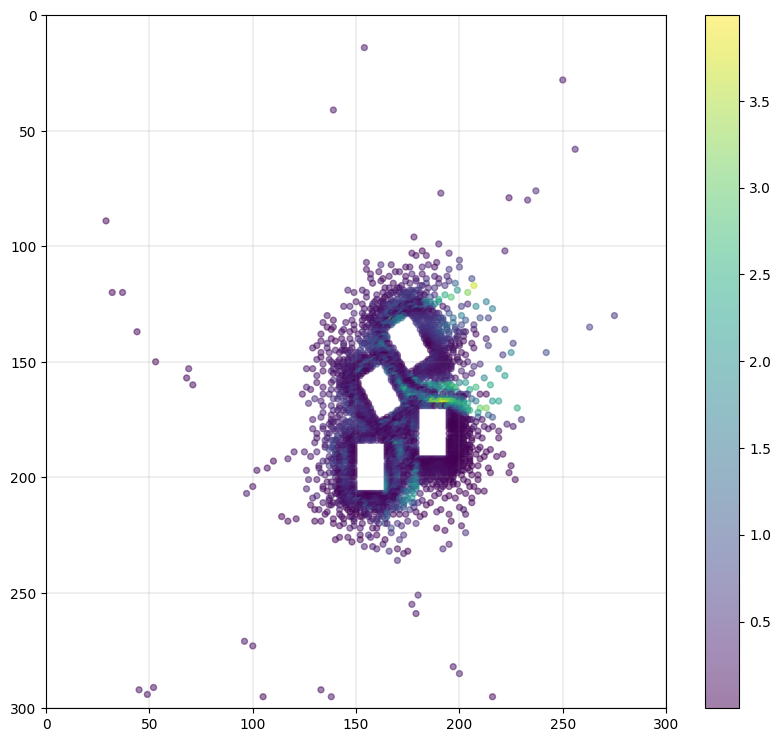

In [17]:
plot_data = data_error_error

fig = plt.figure(figsize = (10,9))
ax = plt.axes()
ax.grid(color='grey',linestyle='-',linewidth=0.3,alpha=0.6)
sctt = ax.scatter(plot_data[:,0],plot_data[:,1],c=plot_data[:,2],s=18,alpha=0.5)
fig.colorbar(sctt)
plt.xlim((0,resolution))
plt.ylim((0,resolution))
plt.gca().invert_yaxis()
plt.show()

In [9]:
avg = np.mean(data_error_error[:,2])
print(avg)
print(np.max(data_error_error[:,2]))

1.664452728979021
10.4172168


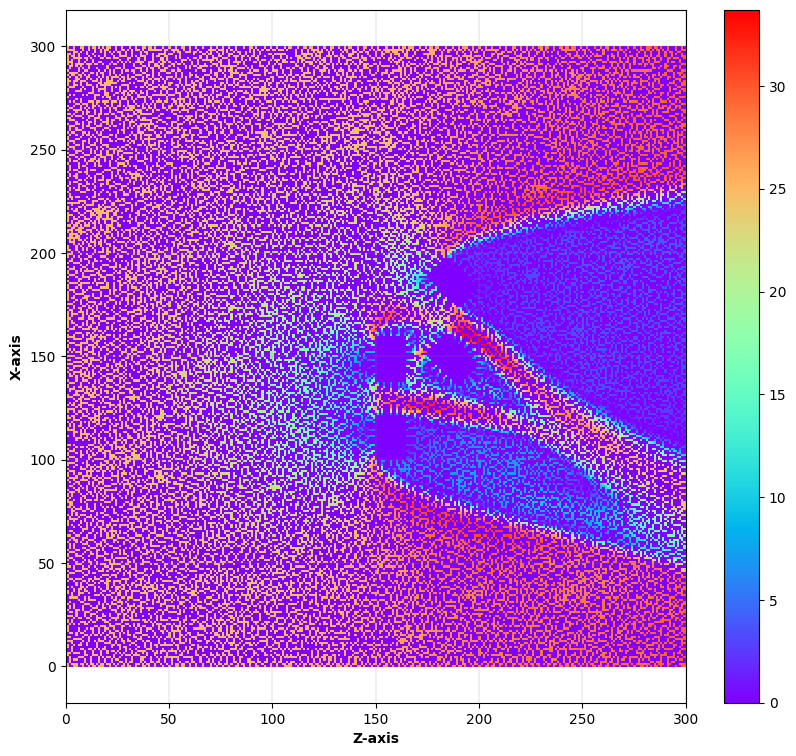

In [5]:
fig = plt.figure(figsize = (10,9))
ax = plt.axes()
ax.grid(color='grey',linestyle='-',linewidth=0.3,alpha=0.6)
sctt = ax.pcolor(data_grid_2,cmap='rainbow')
ax.set_xlabel('Z-axis', fontweight ='bold')
ax.set_ylabel('X-axis', fontweight ='bold')
ax.axis('equal')
plt.xlim((0,resolution))
plt.ylim((0,resolution))
fig.colorbar(sctt)
plt.show()


NameError: name 'data_grid_2_fill' is not defined

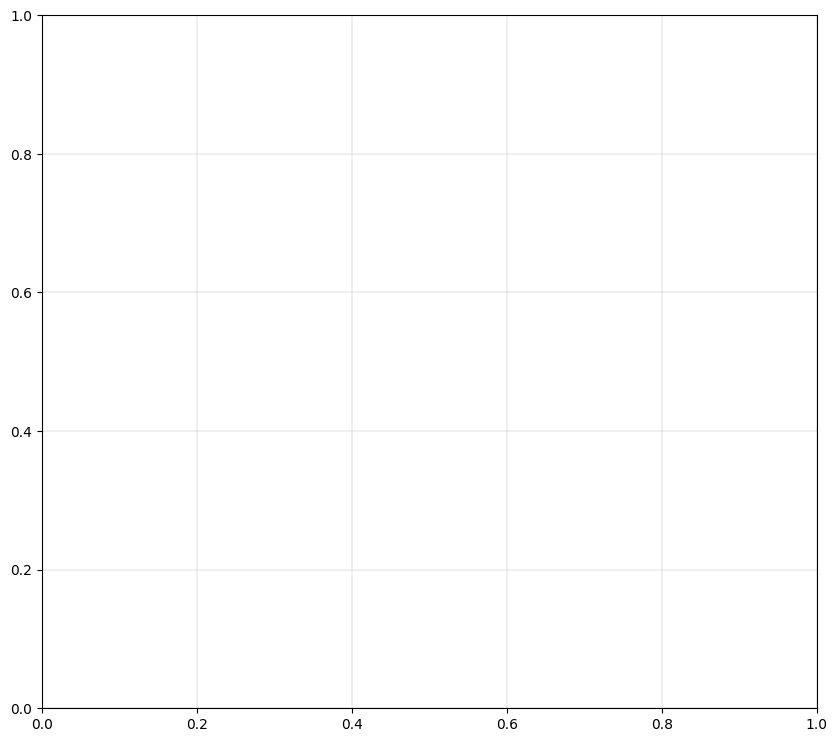

In [4]:
fig = plt.figure(figsize = (10,9))
ax = plt.axes()
ax.grid(color='grey',linestyle='-',linewidth=0.3,alpha=0.6)
sctt = ax.pcolor(data_grid_2_fill,cmap='rainbow')
ax.set_xlabel('Z-axis', fontweight ='bold')
ax.set_ylabel('X-axis', fontweight ='bold')
ax.axis('equal')
plt.xlim((0,resolution))
plt.ylim((0,resolution))
fig.colorbar(sctt)
plt.show()